Unit 6, Lecture 2
====

*Numerical Methods and Statistics*

----

#### Prof. Andrew White, Feb 18 2016

Central Limit Theorem (CLT)
====

Why are normal distributions common? They arise because when you sum multiple random variables, they become normally distributed if:

1. They have finite means and variances
2. You have enough of them (20-25 usually)


Each observation in our distribution, $x$, follows:

$$x = \frac{1}{N} \sum_i^N r_i$$

where $r_i$ are coming from the same distribution or different distributions. The CLT says if $N$ is big enough, $x$ will be normally distributed regardless of how $r_i$s are distributed.

In [1]:
%matplotlib inline
import random
from scipy import stats as ss
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, pi
plt.style.use(['ggplot', '../../che116.mplstyle'])
def normal_pdf(x, mu, sigma):
    return 1 / (sigma * sqrt(2 * pi)) * np.exp(-(x - mu)**2 / (2. * sigma))
rochester_blue = "#00467f"
rochester_gold = "#ffdd00"

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


CLT Demonstration with Beta Distribution
====

Consider sampling from a beta distribution.

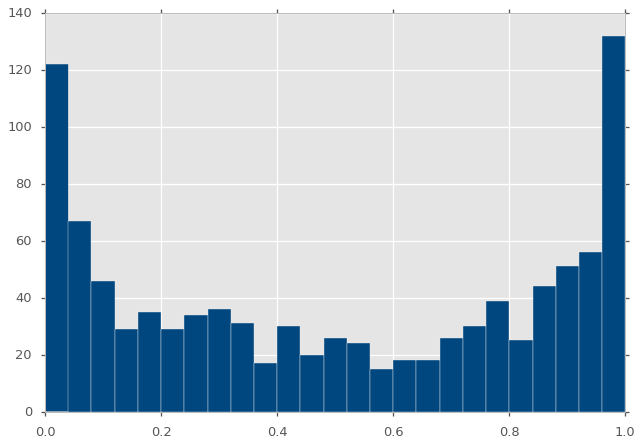

In [7]:
#get 1000 random numbers from the SAME beta distribution
data = ss.beta.rvs(0.5, 0.5, size=1000) 

#histogram the samples with 25 bins and color them Rochester blue
plt.hist(data, 25, color=rochester_blue)

#Show the plot. 
plt.show() 

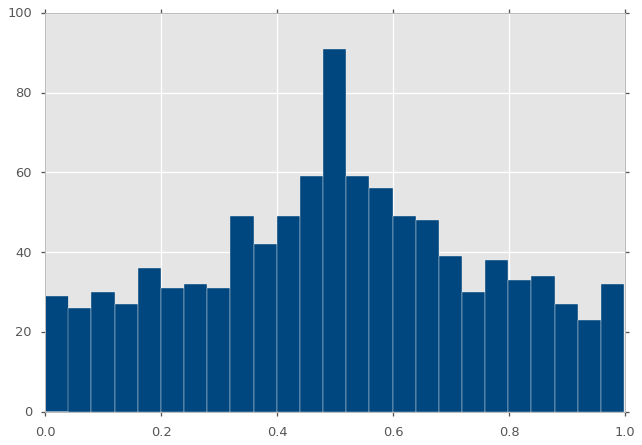

In [8]:
#Sample 2 beta numbers 1000 times
N = 2
data = np.empty(1000)
for i in range(1000):
    data[i] = np.mean(ss.beta.rvs(0.5, 0.5, size=N))

#histogram the samples with 25 bins and color them Rochester blue
plt.hist(data, 25, color=rochester_blue)

plt.show() 

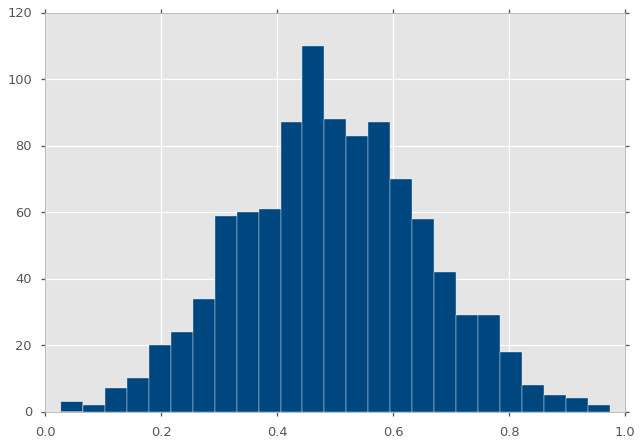

In [9]:
#Sample 5 beta numbers 1000 times
N = 5
data = np.empty(1000)
for i in range(1000):
    data[i] = np.mean(ss.beta.rvs(0.5, 0.5, size=N))

#histogram the samples with 25 bins and color them Rochester blue
plt.hist(data, 25, color=rochester_blue)

plt.show() 

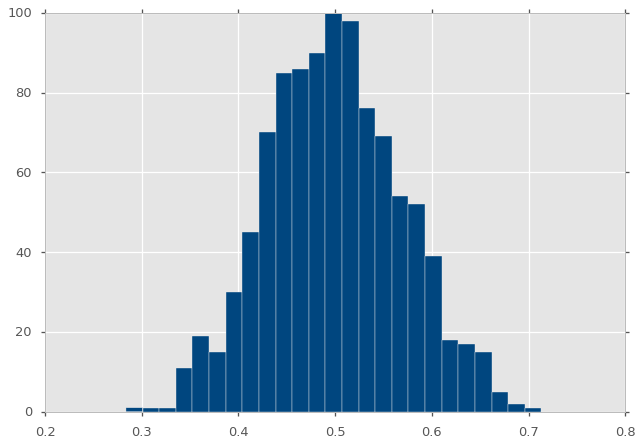

In [10]:
#Sample 25 beta numbers 1000 times
N = 25
data = np.empty(1000)
for i in range(1000):
    data[i] = np.mean(ss.beta.rvs(0.5, 0.5, size=N))

#histogram the samples with 25 bins and color them Rochester blue
plt.hist(data, 25, color=rochester_blue)

plt.show() 

CLT Demonstration with Multiple Binomial Distribution
====

Consider sampling from a set of binomial distribututions and taking the average of the samples. The CLT applies even though we're using different distributions.

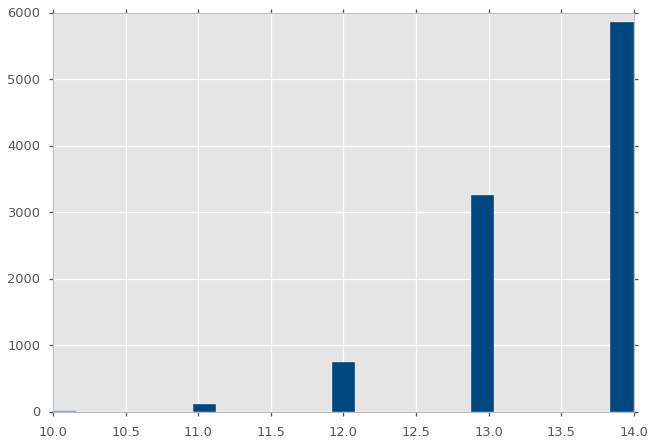

In [11]:
N = 1

some_ps = np.random.random(N) #Create an array of p parameters to use

#Create N trial numbers between 1 and 15. We only go up to 15 because
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1,15,N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
         #We use the jth distribution parameters to sample
        point += ss.binom.rvs(some_Ms[j], some_ps[j], size=1)[0]
    #We cast to float, since everything is done until now in integers
    data.append(float(point) / N) 

plt.hist(data, 25, color=rochester_blue)
plt.show()

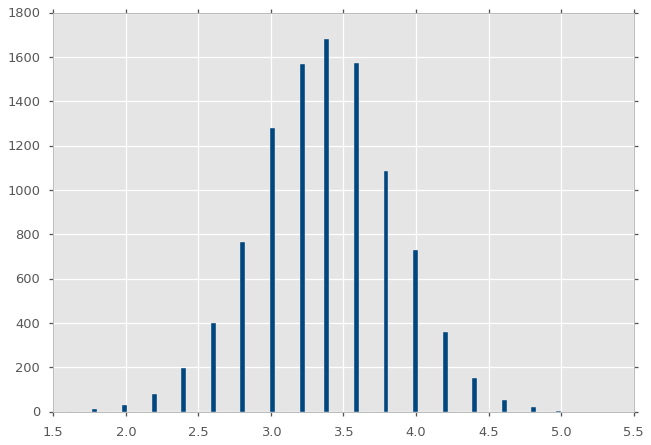

In [12]:
N = 5

some_ps = np.random.random(N) #Create an array of p parameters to use

#Create N trial numbers between 1 and 15. We only go up to 15 because
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1,15,N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
        point += ss.binom.rvs(n=some_Ms[j], p=some_ps[j], size=1)[0] 
    data.append(float(point) / N)

plt.hist(data, 100, color=rochester_blue)
plt.show()

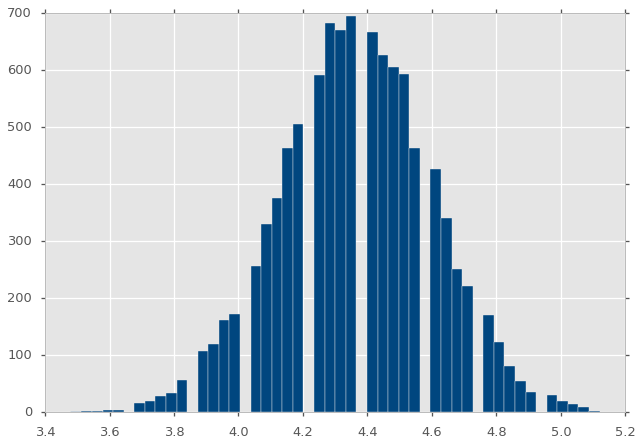

In [13]:
N = 25

some_ps = np.random.random(N) #Create an array of p parameters to use

#Create N trial numbers between 1 and 15. We only go up to 15 because
#We don't go past 15 because it's time consuming to compute the numbers
some_Ms = np.random.randint(1,15,N)

#create a place to store our data
data = []
for i in range(10000):
    point = 0
    for j in range(N):
        point += ss.binom.rvs(n=some_Ms[j], p=some_ps[j], size=1)[0] 
    data.append(float(point) / N)

plt.hist(data, 50, color=rochester_blue)
plt.show()

CLT Trivia
====

Inidcate if the CLT applies to the following process:

* You take the yearly rainfall in 25 counties in Rochester and compute their average.
* You compute the average rainfall in a paricular city over the last 25 years.
* You have 20 temperature sensors placed inside of a batch reactor and compute their average.
* You measure the weight of 25 chemical samples
* You eat 25 random candy bars per day and sum up their calories.
* Your scale is inaccurate due to 20 sources of error (e.g, electrical circuit components air pressure, calibration). Assume their error is additive. You meausre the weight of something.
* Your scale is not normally distributed. Each time you weigh something, you weigh it 22 times and take the average.

Yes, yes, yes, no (you did not average them), yes, yes, yes

Discovering the true mean
====

One important application of the CLT is finding the true mean ($\mu$) of a distribution by observing a few samples. Our error in finding $\mu$ is described by:

$$\DeclareMathOperator{\P}{P}$$
$$ \P(\mu - \bar{x})$$

where $$\bar{x} = \frac{1}{N} \sum_i^N x_i$$

In order to describe how close our estimate, $\bar{x}$, is of the true or population mean $\mu$, we need to know how $\P(\mu - \bar{x})$ behaves. Is it normal? How does its standard deviation/variance change? Is it a function of sample size?

Let's see some code which calculates $\bar{x}$ multiple times and compares it with $\mu$. 

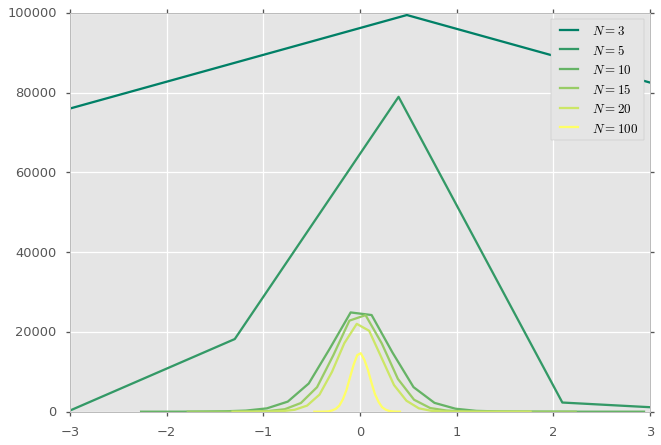

In [14]:
def make_hist(N, mean=12, std_dev=3, bins=25, samples=100000):
    data = [] #we store results here
    #We're going through the process of computing a sample mean/var this many times
    for i in range(samples):
        #create N random samples.
        random_samples = ss.norm.rvs(loc=mean, scale=std_dev, size=N)
        sample_mean = np.mean(random_samples)#We take the mean
        #compute the variance. The ddof argument tells numpy to use
        #N - ddof in the divisor. This takes care of our problem
        #with N-1 we saw from HW 3
        sample_var = np.var(random_samples, ddof=1) 
        #The sample is how far off our sample mean is from the true mean.
        #We standardize by our estimate of the sample standard deviation.
        #We do this because then our results don't depend on 
        #the standard deviation
        data.append((sample_mean - mean) / sqrt(sample_var))
    #After generating the data, we histogram with the given bin number
    hist, bins = np.histogram(data, bins)
    #We compute the centers of the bins by averaging the intervals
    #that make up the bins
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    return hist, bin_centers

#These are the sample sizes we'll try out
N = [3, 5, 10, 15, 20, 100]
#This creates a set of points between 0 and 1 that represent how
#far along in analzying the sample sizes we are.
color_i = np.linspace(0, 1.0, len(N))
#This creates a color function, using the summer palette
color_map = plt.get_cmap("summer")
#We loop over the color_i, which is used to get our line colors
#and the sample size
for i, Ni in zip(color_i, N):
    #call our function above
    hist, bin_centers = make_hist(Ni)
    #plot the results, label it, and use our color function to get a color
    plt.plot(bin_centers, hist, color=color_map(i), label="$N={}$".format(Ni))
    
#add a plotting legend
plt.legend()
#set the x-axis limit
plt.xlim(-3, 3)
plt.show()

Error in Sample Mean
====

As the number of samples goes up, our uncertainty in the sample mean goes down. The rate is the square root of the number of samples.

The distribution we were interested in, $\P(\bar{x} - \mu)$, looks normal and its standard deviation gets smaller as $N$ gets higher.

The error in sample mean is a normal distribution with ${\cal N} (0, \sigma / \sqrt{N})$  where $\sigma$ is the true/population $\sigma$. We usually call the standard deviation of this distribution the "standard error":

$$\sigma_e = \frac{\sigma}{\sqrt{N}} $$

**Remember: The mean of $\P(\bar{x} - \mu)$ is 0.**

Error in Sample Mean - Example Problem
====

I know that $\sigma = 0.2$ g for a chemical balance. I am calibrating my micro-pipettes which requires me to weigh out a volume of water. I weigh out 1 ml of water 20 times with a micro-pipette. The sample mean is 1.001 g. What is the probability the true mean of the micro-pipette is within 0.001 g of the sample mean?

This is a normal distribution with ${\cal N} (0, \sqrt{0.2^2 / 20})$ and I want the interval between -0.0005 and 0.0005.

$\DeclareMathOperator{\erf}{erf}$
$\DeclareMathOperator{\cdf}{CDF}$
$$\int_{Z_1}^{Z_2} {\cal N}(0, 1) = \cdf(Z_2) - \cdf(Z_1)$$

In [15]:
from math import sqrt

sigma = sqrt(0.02**2 / 20)
Z1 = -0.0005 / sigma
Z2 = -Z1

print( ss.norm.cdf(Z2) - ss.norm.cdf(Z1))

0.0890207074894


Returning to finding the error in the sample mean
====
If the flight time of my quadcopter is normally distributed and I take the average of 5 samples, does the difference between the average and the true mean follow the CLT?

Now we include the $1/N$ term we observed previously, so that we remove the influence of sampling

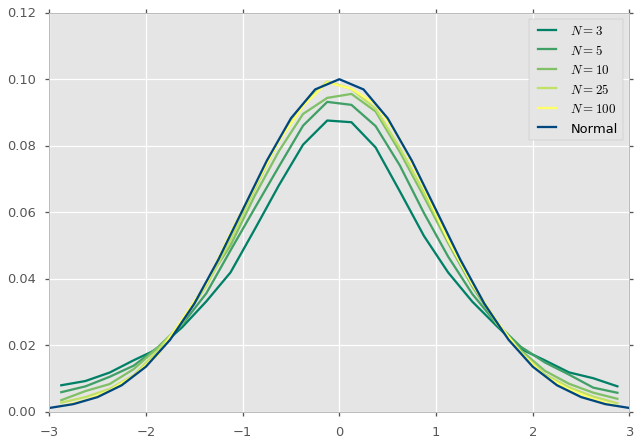

In [17]:
def make_hist(N, mean=12, std_dev=3, bins=25, samples=100000):
    data = []
    for i in range(samples):
        random_samples = np.random.normal(mean, std_dev, N) 
        sample_mean = np.mean(random_samples)
        sample_var = np.var(random_samples) * (N / (N - 1.0))
        #We add the sqrt(N) dependence below
        data.append((sample_mean - mean) / (sqrt(sample_var) / sqrt(N)))
    hist, bins = np.histogram(data, bins = np.linspace(-3, 3, bins))
    bin_centers = (bins[1:] + bins[:-1]) / 2.
    #This line we changed so that we're working in probability, not counts.
    return hist / float(samples), bin_centers 

N = [3, 5, 10, 25, 100]
color_i = np.linspace(0, 1.0, len(N))
color_map = plt.get_cmap("summer")
for i, Ni in zip(color_i, N):
    hist, bin_centers = make_hist(Ni)
    plt.plot(bin_centers, hist, color=color_map(i), label="$N={}$".format(Ni))

from math import erf
x = np.linspace(-3,3,25)
plt.plot(x,normal_pdf(x, 0, 1) / (erf(3 / sqrt(2)) - \
                                  erf(-3 / sqrt(2))) / 2,
         label="Normal", color=rochester_blue)
    
plt.legend()
plt.show()

Do small sample numbers obey CLT?
====

**Not until ~25 samples**. If the sample size is smaller, assuming a normal distribution gives too conservative of intervals.

Student's t-distribution
====
The distribution which describes the distance between the sample and true mean is called the Student's $t$-distribution. 

$P(\mu - \bar{x})$ follows a $t$-distribution with $\sigma = \sigma_x / \sqrt{N}$. ${\cal T}(0, \sigma_x / \sqrt{N})$

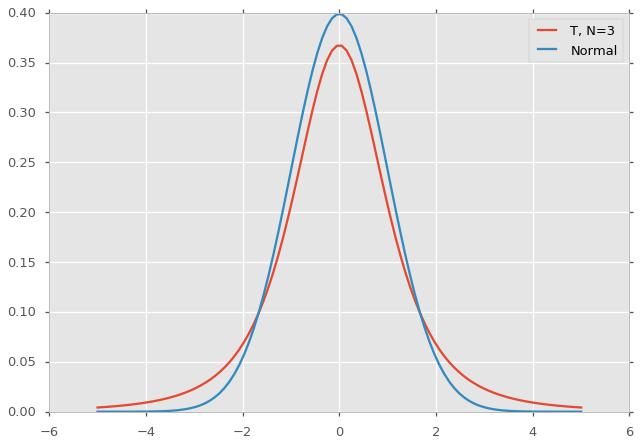

In [18]:
import scipy.stats

#make some points
x = np.linspace(-5,5, 100)

#Compute pdf on t and normal
y1 = scipy.stats.t.pdf(x, df=3)
y2 = scipy.stats.norm.pdf(x)

plt.plot(x,y1, label="T, N=3")
plt.plot(x,y2, label="Normal")
plt.legend()

plt.show()

Scipy Stats
====
[This library](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html) provides a consistent way of working with all probability distributions.

    scipy.stats.[name].[function](df=?, loc=?, scale=?)
   
* `name`: distribution name
* `function`: `pdf` (PDF), `rvs` (random variable), `cdf` (integrated pdf), `ppf` (input desired confidence, outputs critical calue)
* `df`: sample size if T-distribution
* `loc`: center, so $\mu$ in T and normal. Other distributions have different use
* `scale`: scale, so $\sigma$ in T and normal

In [19]:
#Get 10 random numbers from normal distribution
scipy.stats.norm.rvs(size=10) 

array([-1.09843114,  0.44161455,  1.25112626, -0.02837263, -0.42414373,
       -1.4154054 ,  0.33413663,  2.01138381, -2.67852147,  0.01122912])

In [20]:
#Integrate N(2,1) from -2 to 2
scipy.stats.norm.cdf(2, loc=2, scale=1) - \
    scipy.stats.norm.cdf(-2, loc=2, scale=1)

0.49996832875816688

In [21]:
#Get Z for 95% single-sided confidence interval in T (N=10) 
#distribution and Normal
print scipy.stats.t.ppf(0.95, df=10)
print scipy.stats.norm.ppf(0.95)

1.81246112281
1.64485362695


Computing Confidence Interval for error in mean with $t$-Distribution 
====

We know that the error in the mean follows a $t$-distribution for small $N$. What if we want a confidence interval for where the true mean lies?

$$P(a < \mu < b) = 0.95$$

One simplification we can make right away is that we know $\mu$ will be centered at $\bar{x}$ and is symmetric:

$$P( \bar{x} - y < \mu<  - \bar{x} + y) = 0.95$$

where $y$ is some number we need to find. We can further rewrite this as:

$$P( - y < \mu - \bar{x}<  + y) = 0.95$$

which we know follows a $t-$distribution. 


We know that $P(\mu - \bar{x})$ follows a ${\cal T}(0, \sigma_x /\sqrt{N})$ distribution. We can use the same idea as $Z$-scores

$$T(s) = \frac{s - 0}{\sigma_x / \sqrt{N}}$$

The 'mean' of this distribution is 0, because our error in true mean is always centered around 0.

After taking 5 samples, we've found that the sample mean is 45 and the sample standard deviation, $\sigma_x$ is 3. What is the 95% confidence interval for the true mean, $\mu$?

We can write this more like this:

$$P(- y < \mu - \bar{x} < +y) = 0.95$$

Our interval will go from 2.5% to 97.5% (95% of probability), so let's find the $T$-value for $-\infty$ to 2.5% and 97.5% to $\infty$. Remember that the $T$-value depends on N

In [22]:
import scipy.stats

 #The lower T Value. YOU MUST GIVE THE SAMPLE NUMBER
print scipy.stats.t.ppf(0.025, 5)
print scipy.stats.t.ppf(0.975, 5)

-2.57058183661
2.57058183661


$$T_{low} = \frac{-y - 0}{\sigma_x / \sqrt{N}}$$
$$T_{low} = -\frac{y}{\sigma_x / \sqrt{N}}$$

$$y = -T_{low}\frac{\sigma_x}{\sqrt{N}}$$

In [23]:
print -scipy.stats.t.ppf(0.025, 5) * 3 / sqrt(5)

3.44879743704


The final answer is $P(45 - 3.45 < 45 < 45 + 3.45) = 0.95$ or $45\pm 3.45$

Computing Confidence Interval for Error in Mean Steps
====

1. Is the sample size greater than 25? Use standard normal ($Z$) otherwise the $t$-distribution for your sample size ($T$).
2. Build your interval in probability. For example, a 95% double-sided goes from 2.5% to 97.5%
3. Find the $Z$ or $T$ values that match your interval. For example, $Z_{low} = -1.96$ to $Z_{high} = 1.96$ is for a double-sided 95% confidence inerval. Use the `scipy.stats.t.ppf` or `scipy.stats.norm.ppf` function to find them.
4. Use the $Z(s) = s \sqrt{N} / \sigma_x$ or $T(s) = s \sqrt{N} / \sigma_x$ equation to find the interval values in your particular distribution.
5. Report your answer either as an interval or the $\pm$ notation.

Shortcut Method For Normal
====

Here's how to quickly do these steps in Python for sample size greater than 25

In [24]:
import scipy.stats
import numpy as np

data = scipy.stats.norm.rvs(size=100, scale=15, loc=50)
#Check if sample size is big enough.
#This code will cause an error if it's not
assert len(data) > 25 

CI = 0.95
sample_mean = np.mean(data)
#The second argument specifies what the denominator should be (N - x),
#where x is 1 in this case
sample_var = np.var(data, ddof=1) 
Z = scipy.stats.norm.ppf((1 - CI) / 2)
y = -Z * np.sqrt(sample_var / len(data))

print('{} +/ {}'.format(sample_mean, y))
                             

53.1798580873 +/ 2.96048883269


Is that low? Well, remember that our error in the mean follows standard deviation divided by the root of number of samples.

Shortcut Method For $t$-Distribution
====

Here's how to quickly do these steps in Python for sample size less than 25

In [24]:
import scipy.stats

data = scipy.stats.norm.rvs(size=4, scale=15, loc=50)
CI = 0.95
sample_mean = np.mean(data)
sample_var = np.var(data, ddof=1) 
T = scipy.stats.t.ppf((1 - CI) / 2, df=len(data))
y = -T * sqrt(sample_var / len(data))

print('{} +/ {}'.format(sample_mean, y))
                             

49.51454838735147 +/ 28.652601059630598


Example of Prediction Intervals
====

I *know* that the thickness of a metal slab is distributed according to ${\cal N}(3.4, 0.75)$. Construct a prediction interval so that a randomly chosen metal slab will lie within it 95% confidence.

$$P( \mu - y < x < \mu + y) = 0.95$$

This is a prediction interval, so we're computing a interval on the distribution itself and we know everything about it.

$$Z(\mu + y) = \frac{\mu + y - \mu}{\sigma} \Rightarrow y = \sigma Z$$

$$Z = 1.96$$

$$x = \mu \pm 1.96 \sigma = 3.4 \pm 6.6$$

A randomly chosen slab will have a thickness of $3.4 \pm 0.75$ 95% of the time. 

Example of error in mean with known $\sigma$
====

I measure the thickness of 35 metal slabs and find that $\bar{x}$, the sample mean, is 3.38. If I know that $\sigma = 0.75$, construct a confidence interval that will contain the true mean $\mu$ with 95% confidence.

From last lecture we know that $P(\bar{x} - \mu)$ is normally distributed with ${\cal N}(0, \sigma / \sqrt{N})$. We want to find

$$ P(-y < \bar{x} - \mu < +y) = 0.95$$

$$ Z(+y) = \frac{y - 0}{\sigma_e} = \frac{y}{\sigma / \sqrt{N}} \Rightarrow y = \frac{\sigma}{\sqrt{N}} Z$$

$$y = \frac{0.75}{\sqrt{35}}1.96 = 0.248$$

$$ \mu - \bar{x} = 0 \pm 0.248$$

$$ \mu = 3.38 \pm 0.248$$

At a 95% confidence level, the true mean is $3.38 \pm 0.248$. 

Example 1 of error in mean with unknown $\sigma$
====

I measure the thickness of 6 metal slabs and find that $\bar{x}$, the sample mean, is 3.65 and the sample standard deviation is $1.25$. Construct a confidence interval that will contain the true mean $\mu$ with 90% confidence.


$$T(+y) = \frac{y - 0}{\sigma_x / \sqrt{N}} \Rightarrow y = \frac{\sigma_x}{\sqrt{N}} T$$

We know that $P(\bar{x} - \mu)$ is a $t$-distribution because $N$ is small. It is distributed as ${\cal T}(0, \sigma_x / \sqrt{N})$. We want to find

$$ P(-y < \bar{x} - \mu < +y) = 0.90$$

In [1]:
import scipy.stats

#Notice it is 95%, so the interval goes from
#5% to 95% containing 90% of probability
T = scipy.stats.t.ppf(0.95, df=6)
print T

1.94318028039


$$ y = \frac{1.25}{\sqrt{6}} 1.944 = 0.992 $$
$$\mu = 3.65 \pm 0.992$$

The population mean of the slabs is $3.65 \pm 0.992$ with 90% confidence.

Example 2 of error in mean with unknown $\sigma$
====

I measure the thickness of 25 metal slabs and find that $\bar{x}$, the sample mean, is 3.42 and the sample standard deviation is 0.85. Construct a confidence interval that will contain the true mean $\mu$ with 90% confidence.

We know, just like last example, that $P(\bar{x} - \mu)$ is a normal distribution because $N$ is large enough for the central limit theorem to apply. It is distributed as ${\cal N}(0, \sigma_x / \sqrt{N})$. We want to find

$$ P(-y < \bar{x} - \mu < +y) = 0.90$$

$$Z(+y) = \frac{y - 0}{\sigma_x / \sqrt{N}} \Rightarrow y = \frac{\sigma_x}{\sqrt{N}} Z$$
$$ y = \frac{0.85}{\sqrt{25}} 1.65 = 0.332$$
$$\mu = 3.42 \pm 0.332$$

In [ ]:
%system jupyter nbconvert --to slides --post serve Unit_6_Lecture_2.ipynb